Ensemble learning

Stacking

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_breast_cancer

from sklearn.metrics import accuracy_score

In [2]:
data = load_breast_cancer()
data.target_names, data.feature_names

(array(['malignant', 'benign'], dtype='<U9'),
 array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'))

In [3]:
from sklearn import preprocessing

X = preprocessing.MinMaxScaler().fit_transform(data.data)
y = data.target

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = 0.85
)

In [9]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train, y_train, train_size=0.75)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train, y_train, train_size=0.75)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_train, y_train, train_size=0.75)

First model - Decision tree classifier

In [10]:
from sklearn import tree
from sklearn import metrics

model_1 = tree.DecisionTreeClassifier(max_depth=1)
model_1 = model_1.fit(X_train_1, y_train_1)

y_pred_1 = model_1.predict(X_test_1)
print("Accuracy:",metrics.accuracy_score(y_test_1, y_pred_1))
print("Precision:",metrics.precision_score(y_test_1,y_pred_1))
print("Recall:",metrics.recall_score(y_test_1,y_pred_1))
print("F1 score:",metrics.f1_score(y_test_1,y_pred_1))

Accuracy: 0.8842975206611571
Precision: 0.8493150684931506
Recall: 0.9538461538461539
F1 score: 0.8985507246376813


### Third model - Multinomial Naive Bayes


In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

model_3 = MultinomialNB().fit(X_train_3, y_train_3)

y_pred_3 = model_3.predict(X_test_3)

print("Accuracy:",metrics.accuracy_score(y_test_3, y_pred_3))
print("Precision:",metrics.precision_score(y_test_3,y_pred_3))
print("Recall:",metrics.recall_score(y_test_3,y_pred_3))
print("F1 score:",metrics.f1_score(y_test_3,y_pred_3))

Accuracy: 0.8181818181818182
Precision: 0.7717391304347826
Recall: 0.9861111111111112
F1 score: 0.8658536585365854


The final model

In [14]:
from sklearn.linear_model import LogisticRegression

X_train_final = []
y_train_final = []

y_train_final_1 = model_1.predict(X_train)
y_train_final_2 = model_2.predict(X_train)
y_train_final_3 = model_3.predict(X_train)

for i in range(len(y_train_final_1)):
  X_train_final.append([y_train_final_1[i], y_train_final_2[i], y_train_final_3[i]])
  y_train_final.append(y_train[i])

# Training the final model on the outputs of other models
model_final = LogisticRegression().fit(X_train_final, y_train_final)

In [15]:
from sklearn import metrics

X_test_final = []
y_test_final = []

y_test_final_1 = model_1.predict(X_test)
y_test_final_2 = model_2.predict(X_test)
y_test_final_3 = model_3.predict(X_test)

for i in range(len(y_test_final_1)):
  X_test_final.append([y_test_final_1[i], y_test_final_2[i], y_test_final_3[i]])
  y_test_final.append(y_test[i])

y_pred_final = model_final.predict(X_test_final)

print("Accuracy:",metrics.accuracy_score(y_test_final, y_pred_final))
print("Precision:",metrics.precision_score(y_test_final,y_pred_final))
print("Recall:",metrics.recall_score(y_test_final,y_pred_final))
print("F1 score:",metrics.f1_score(y_test_final,y_pred_final))

Accuracy: 0.9302325581395349
Precision: 0.9649122807017544
Recall: 0.9322033898305084
F1 score: 0.9482758620689654


Stacking using sklearn library - Breast Cancer dataset

In [16]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('gnb', GaussianNB()),
    ('dt', tree.DecisionTreeClassifier(max_depth=1)),
    ('mnb', MultinomialNB())
]

model_stacked = StackingClassifier(estimators=estimators).fit(X_train, y_train)

y_pred_stacked = model_stacked.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_stacked))
print("Precision:",metrics.precision_score(y_test,y_pred_stacked))
print("Recall:",metrics.recall_score(y_test,y_pred_stacked))
print("F1 score:",metrics.f1_score(y_test,y_pred_stacked))

Accuracy: 0.9069767441860465
Precision: 0.9473684210526315
Recall: 0.9152542372881356
F1 score: 0.9310344827586206


Bagging

Using BaggingClassifier

In [17]:
from sklearn.ensemble import BaggingClassifier

model_bagged = BaggingClassifier(max_features = 0.67).fit(X_train, y_train)

y_pred_bagged = model_bagged.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_bagged))
print("Precision:",metrics.precision_score(y_test,y_pred_bagged))
print("Recall:",metrics.recall_score(y_test,y_pred_bagged))
print("F1 score:",metrics.f1_score(y_test,y_pred_bagged))

Accuracy: 0.9418604651162791
Precision: 0.95
Recall: 0.9661016949152542
F1 score: 0.957983193277311


Using RandomForestClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

model_random_forest = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

y_pred_random_forest = model_random_forest.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_random_forest))
print("Precision:",metrics.precision_score(y_test,y_pred_random_forest))
print("Recall:",metrics.recall_score(y_test,y_pred_random_forest))
print("F1 score:",metrics.f1_score(y_test,y_pred_random_forest))

Accuracy: 0.9767441860465116
Precision: 0.9830508474576272
Recall: 0.9830508474576272
F1 score: 0.9830508474576272


Adaboost Classifier

In [19]:
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=1).fit(X_train, y_train)

y_pred_adaboost = model_adaboost.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_adaboost))
print("Precision:",metrics.precision_score(y_test,y_pred_adaboost))
print("Recall:",metrics.recall_score(y_test,y_pred_adaboost))
print("F1 score:",metrics.f1_score(y_test,y_pred_adaboost))

Accuracy: 0.9883720930232558
Precision: 1.0
Recall: 0.9830508474576272
F1 score: 0.9914529914529915


Exercise

Try Adaboost Regression on contrete_data.csv

In [32]:
from google.colab import drive


from sklearn import preprocessing

data = pd.read_csv('/content/sample_data/Contrete.csv')

df = pd.DataFrame(data)

X = preprocessing.MinMaxScaler().fit_transform(df.iloc[:, :8].values)
y = df['strength'].values

X, y

KeyError: ignored

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80)

loss = 100
count = 0

model_adaboost_regressor = AdaBoostRegressor(n_estimators=500, learning_rate=1, loss='square').fit(X_train, y_train)
y_pred = model_adaboost_regressor.predict(X_test)
loss = mean_squared_error(y_test, y_pred)
print(f"{count}/10 - Error: ", loss)
count = count+1

while loss>10 and count<=10:
  model_adaboost_regressor = AdaBoostRegressor(n_estimators=500, learning_rate=1, loss='square').fit(X_train, y_train)
  y_pred = model_adaboost_regressor.predict(X_test)
  loss = mean_squared_error(y_test, y_pred)
  print(f"{count}/10 - Error: ", loss)
  count = count+1

ValueError: ignored

NameError: ignored

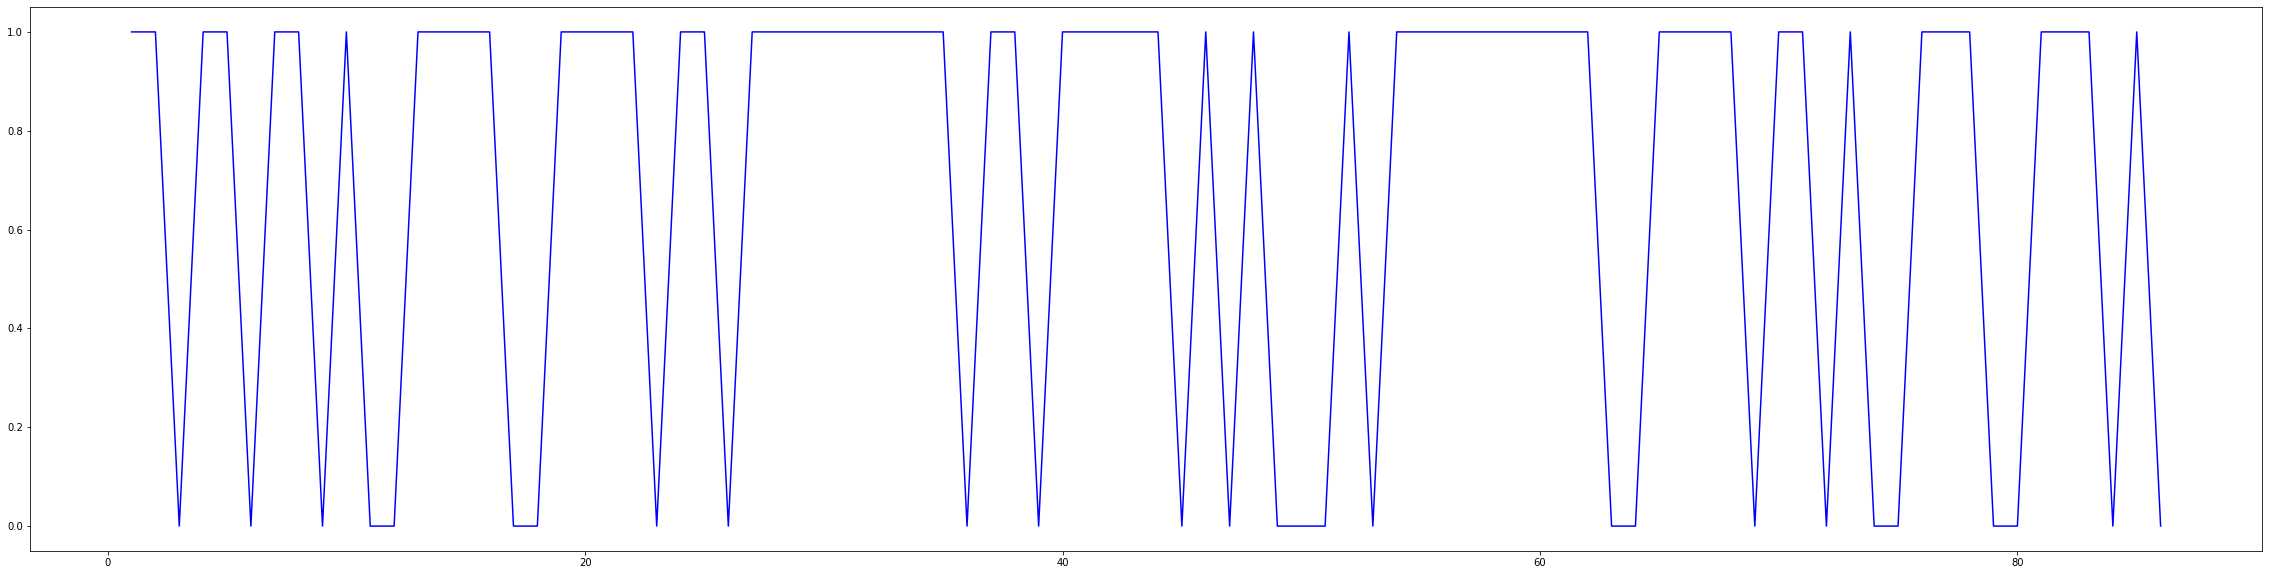

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(40,10))
plt.plot(np.arange(1,len(y_test)+1), y_test, label='Actual', color='blue')
plt.plot(np.arange(1,len(y_pred)+1), y_pred, label='Predicted', color='orange')

plt.legend(["Actual", "Predicted"], loc ="lower right")